# Clustering with Expectation Maximization - NYC collisions dataset

imports and data loading:

In [1]:
from pandas import DataFrame, read_csv
from matplotlib.pyplot import subplots, show
from ds_charts import choose_grid, plot_clusters, plot_line, compute_mse

data: DataFrame = read_csv('data/transformed/NYC_collisions_pca2.csv')
data.pop('PERSON_INJURY')
v1 = 0
v2 = 1

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
rows, cols = choose_grid(len(N_CLUSTERS))

## Expectation Maximization:

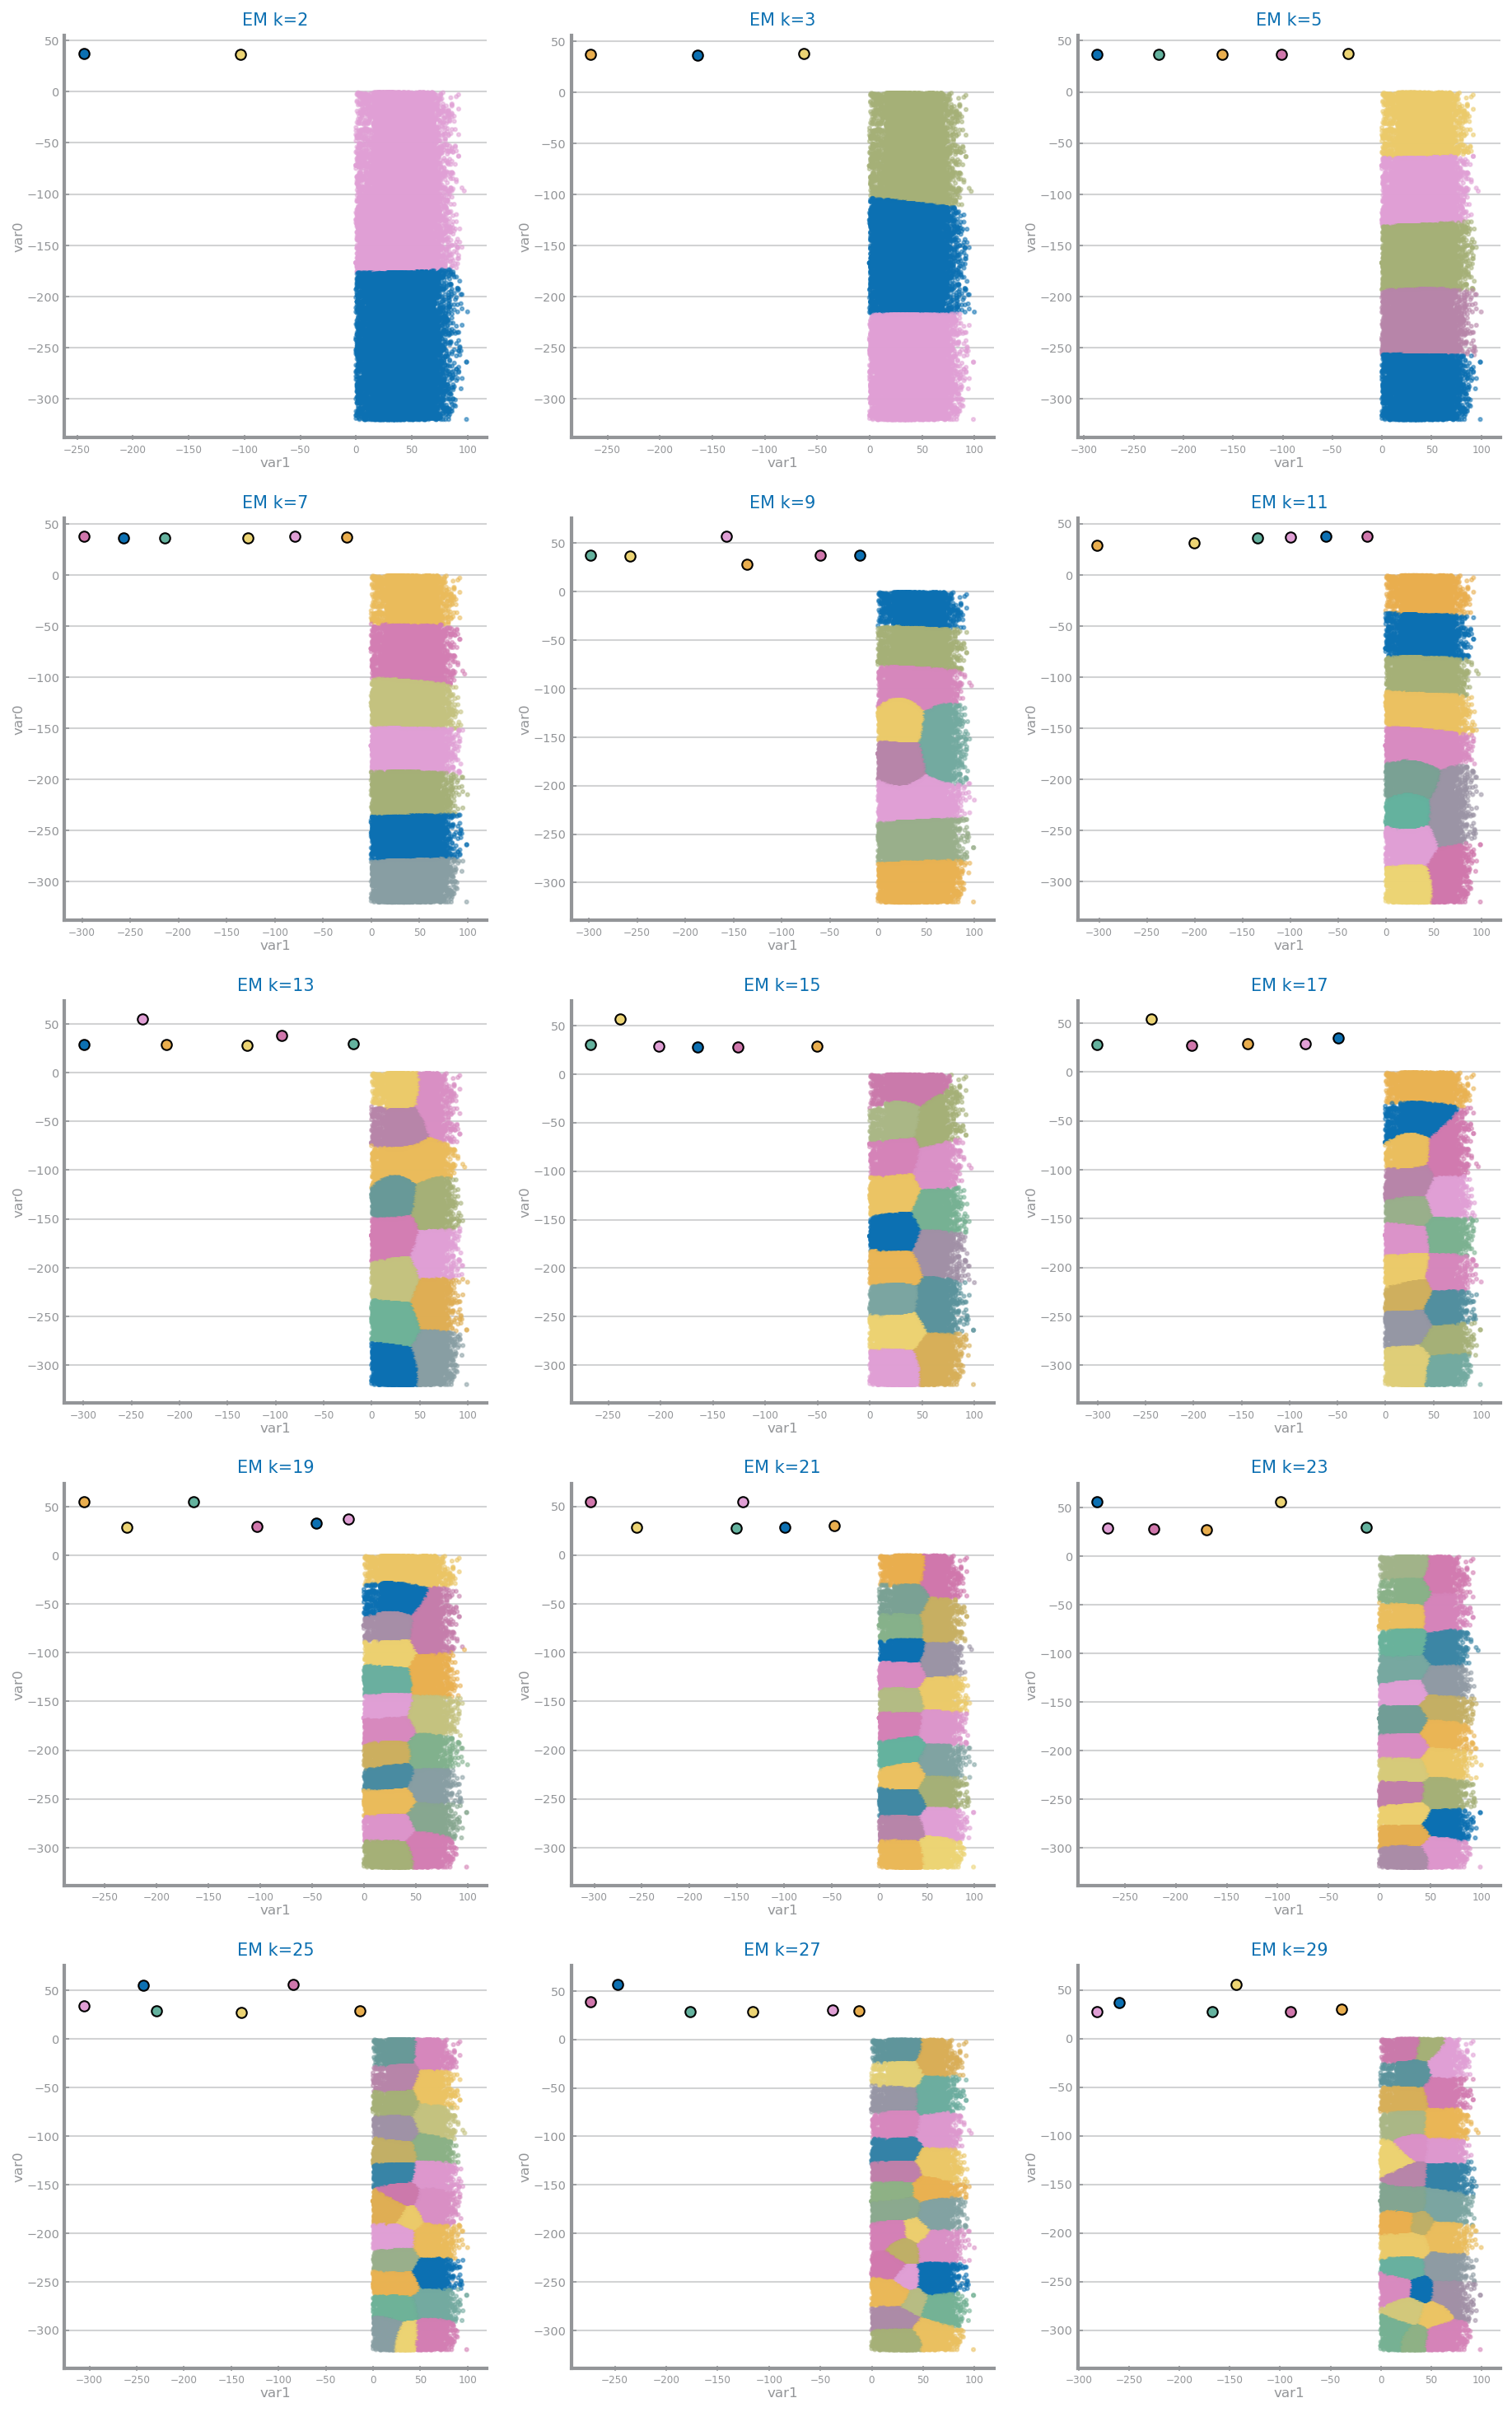

In [2]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

mse: list = []
sc: list = []
_, axs = subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    mse.append(compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    plot_clusters(data, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
show()

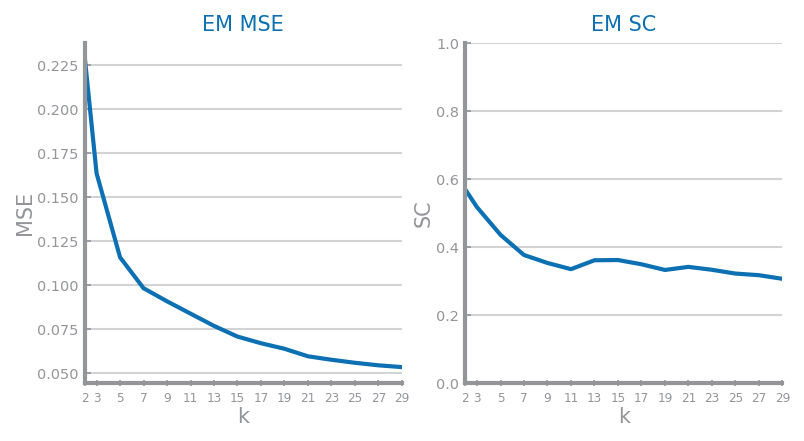

In [3]:
fig, ax = subplots(1, 2, figsize=(6, 3), squeeze=False)
plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE', ax=ax[0, 0])
plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 1], percentage=True)
show()